In [1]:
import torch
import numpy
import matplotlib.pyplot as plt

In [2]:
TEST_DATA_SIZE = 100
X = numpy.random.rand(TEST_DATA_SIZE, 1)
Y = numpy.random.rand(TEST_DATA_SIZE, 1)
Z = numpy.random.rand(TEST_DATA_SIZE, 1)

In [3]:
input_layer = 2
output_layer = 1
learning_rate = 1e-5

def train(hidden_layer: int, epochs: int, print_debug_info: bool = False) -> None:
    device = "cuda" if torch.cuda.is_available() else "cpu"

    x_tensor = torch.tensor(numpy.concatenate((X, Y), axis=1), device=device, dtype=torch.float64)
    y_tensor = torch.tensor(Z, device=device, dtype=torch.float64)

    weights_layer1 = torch.rand(input_layer, hidden_layer, requires_grad=True, device=device, dtype=torch.float64)
    biases_layer1 = torch.rand(hidden_layer, requires_grad=True, device=device, dtype=torch.float64)
    weights_layer2 = torch.rand(hidden_layer, output_layer, requires_grad=True, device=device, dtype=torch.float64)
    biases_layer2 = torch.rand(output_layer, requires_grad=True, device=device, dtype=torch.float64)

    def predict() -> torch.Tensor:
        return (x_tensor @ weights_layer1 + biases_layer1) @ weights_layer2 + biases_layer2

    for i in range(epochs):
        predicted = predict()
        loss = torch.sum(torch.pow(torch.sub(y_tensor, predicted), 2))

        if print_debug_info:
            iteration_id = i + 1
            if iteration_id % 500 == 0:
                print(f"Info at epoch #{iteration_id}:")
                print(f"Loss: {loss.item()}")

        loss.backward()

        with torch.no_grad():
            weights_layer1 -= learning_rate * weights_layer1.grad
            biases_layer1 -= learning_rate * biases_layer1.grad
            weights_layer2 -= learning_rate * weights_layer2.grad
            biases_layer2 -= learning_rate * biases_layer2.grad

            weights_layer1.grad = None
            biases_layer1.grad = None
            weights_layer2.grad = None
            biases_layer2.grad = None

    final_prediction = numpy.array(predict().detach().cpu())

    sub_plot = plt.figure().add_subplot(projection="3d")
    sub_plot.set_title(f"Training a 3D regression model with {hidden_layer} neurons within the hidden layer after {epochs} epochs")

    sub_plot.plot_trisurf(X.reshape(TEST_DATA_SIZE), Y.reshape(TEST_DATA_SIZE), final_prediction.reshape(TEST_DATA_SIZE), color="g", alpha=0.6)
    sub_plot.scatter(X, Y, Z)
    plt.show()

Info at epoch #500:
Loss: 7.2194145911487855
Info at epoch #1000:
Loss: 7.134707563724737
Info at epoch #1500:
Loss: 7.128491887170114
Info at epoch #2000:
Loss: 7.123259684537723
Info at epoch #2500:
Loss: 7.118427464813466
Info at epoch #3000:
Loss: 7.113958428977204
Info at epoch #3500:
Loss: 7.109822589238995
Info at epoch #4000:
Loss: 7.105992667986344
Info at epoch #4500:
Loss: 7.1024438038549995
Info at epoch #5000:
Loss: 7.0991533151464425


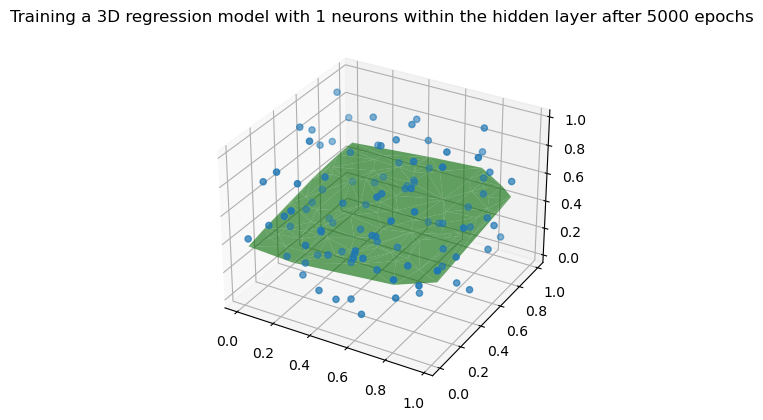

Info at epoch #500:
Loss: 8.096797873786585
Info at epoch #1000:
Loss: 7.780206081257528
Info at epoch #1500:
Loss: 7.55678657488394
Info at epoch #2000:
Loss: 7.398131582949265
Info at epoch #2500:
Loss: 7.2849814179833
Info at epoch #3000:
Loss: 7.204045982647617
Info at epoch #3500:
Loss: 7.146036752066895
Info at epoch #4000:
Loss: 7.104402626054288
Info at epoch #4500:
Loss: 7.074493512669022
Info at epoch #5000:
Loss: 7.052993962036105


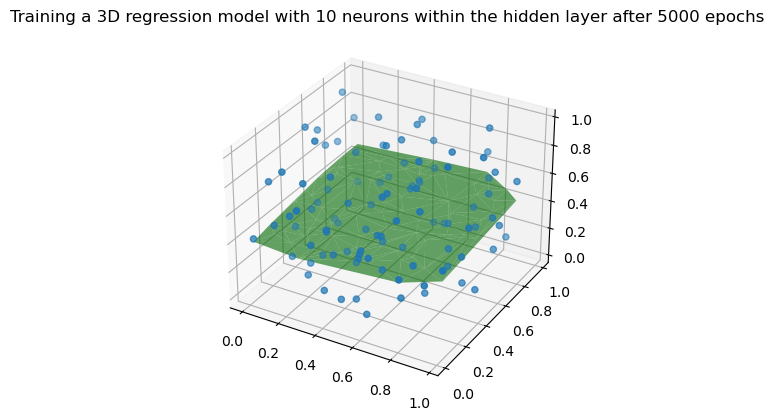

Info at epoch #500:
Loss: 9.146429651237401
Info at epoch #1000:
Loss: 7.078143027662975
Info at epoch #1500:
Loss: 7.000870605086947
Info at epoch #2000:
Loss: 6.997957131177646
Info at epoch #2500:
Loss: 6.9978460726046725
Info at epoch #3000:
Loss: 6.9978417839133575
Info at epoch #3500:
Loss: 6.9978416158303265
Info at epoch #4000:
Loss: 6.997841609134145
Info at epoch #4500:
Loss: 6.997841608862666
Info at epoch #5000:
Loss: 6.99784160885146


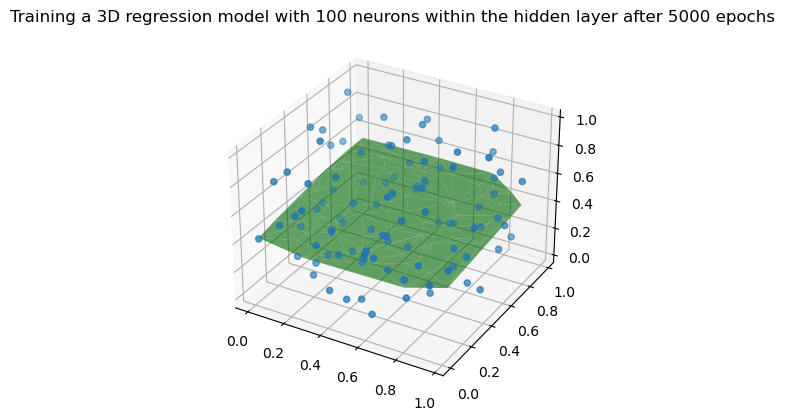

In [4]:
train(1, 5_000, print_debug_info=True)
train(10, 5_000, print_debug_info=True)
train(100, 5_000, print_debug_info=True)
